TFD+Representation dans le domain frequentiel 

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
image_path = r"C:\Users\DELL\Desktop\myimage.jpg"  
image = Image.open(image_path).convert('L')
f = np.fft.fft2(image)  
fshift = np.fft.fftshift(f) 
magnitude_spectrum = 20*np.log1p(np.abs(fshift))

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Image Originale'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Représentation dans le domaine fréquentiel'), plt.xticks([]), plt.yticks([])
plt.show()

# Save the image of the frequency domain representation
plt.savefig(r"C:\Users\DELL\Desktop\frequency_domain_representation.jpg")

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\DELL\\Desktop\\myimage.jpg'

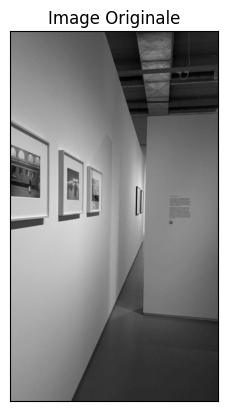

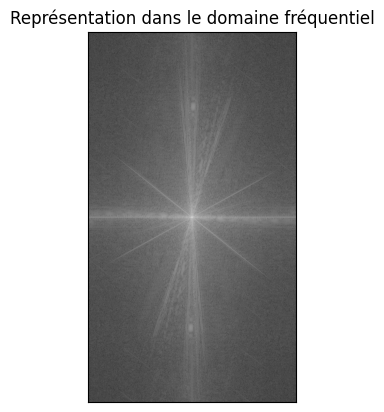

In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

image_path = r"C:\Users\DELL\Desktop\myimage.jpg"  
image = Image.open(image_path).convert('L')
f = np.fft.fft2(image)  
fshift = np.fft.fftshift(f) 
magnitude_spectrum = 20*np.log1p(np.abs(fshift))

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Image Originale'), plt.xticks([]), plt.yticks([])

plt.figure()  
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Représentation dans le domaine fréquentiel'), plt.xticks([]), plt.yticks([])


plt.savefig(r"C:\Users\DELL\Desktop\frequency_domain_representation.jpg")

plt.show()

filtre pass-bas expo


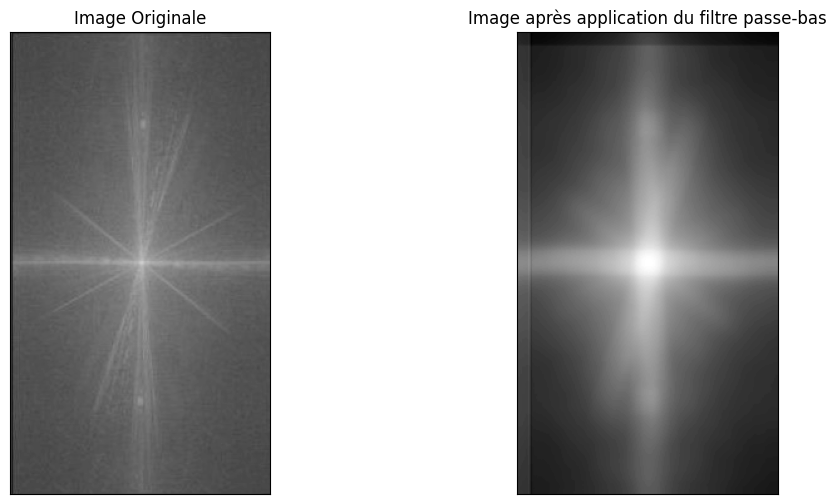

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.signal import convolve2d


image_path = r"C:\Users\DELL\Desktop\frequency_domain_representation.jpg"
image = Image.open(image_path).convert('L')
image = np.array(image)




#traitement



tau = 30          



kernel_size = 21  
kernel = np.fromfunction(lambda x, y: np.exp(-np.sqrt((x - (kernel_size-1)/2)**2 + (y - (kernel_size-1)/2)**2) / tau), (kernel_size, kernel_size))
kernel /= np.sum(kernel)  
filtered_image = convolve2d(image, kernel, mode='same', boundary='symm')
filtered_image = np.clip(filtered_image, 0, 255).astype(np.uint8)
# Save the filtered image
filtered_image_pil = Image.fromarray(filtered_image)
filtered_image_pil.save(r"C:\Users\DELL\Desktop\filtered_image.jpg")




#affichage
plt.figure(figsize=(12, 6))

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Image Originale'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(filtered_image, cmap='gray')
plt.title('Image après application du filtre passe-bas'), plt.xticks([]), plt.yticks([])

plt.show()


In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

# Lire l'image filtrée
img = Image.open(r"C:\Users\DELL\Desktop\frequency_domain_representation.jpg").convert('L')
img = np.array(img)

# Appliquer la Transformée de Fourier
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# Appliquer la Transformée de Fourier inverse
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)

# Prendre seulement la partie réelle de l'image
img_back = np.abs(img_back)

# Afficher l'image originale
plt.imshow(img_back, cmap = 'gray')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\DELL\\Desktop\\frequency_domain_representation.jpg'

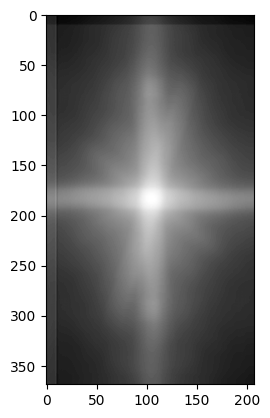

In [15]:
# Appliquer la Transformée de Fourier
f = np.fft.fft2(filtered_image)
fshift = np.fft.fftshift(f)

# Appliquer la Transformée de Fourier inverse
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)

# Prendre seulement la partie réelle de l'image
img_back = np.abs(img_back)

# Afficher l'image originale
plt.imshow(img_back, cmap = 'gray')
plt.show()

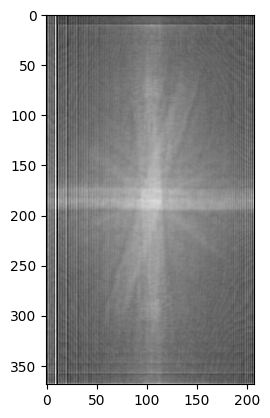

In [16]:
# Appliquer la Transformée de Fourier à l'image originale
f_original = np.fft.fft2(image)
fshift_original = np.fft.fftshift(f_original)

# Appliquer la Transformée de Fourier à l'image filtrée
f_filtered = np.fft.fft2(filter)
fshift_filtered = np.fft.fftshift(f_filtered)

# Remplacer l'amplitude du spectre filtré par l'amplitude du spectre original
fshift_filtered = np.abs(fshift_original) * np.exp(1j * np.angle(fshift_filtered))

# Appliquer la Transformée de Fourier inverse
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)

# Prendre seulement la partie réelle de l'image
img_back = np.abs(img_back)

# Afficher l'image originale
plt.imshow(img_back, cmap = 'gray')
plt.show()